In [15]:
import numpy as np
rand_arr_2 = np.random.randint(0,16,(3,4,4))

print(rand_arr_2)

[[[ 6  9  8 14]
  [ 1  9  2 15]
  [ 3 15 15  2]
  [ 5  3 12  3]]

 [[ 0  7 10  3]
  [ 8  4  9 13]
  [ 1 12  3 13]
  [ 5  6  9  7]]

 [[13  7  3 14]
  [ 0  3  1  5]
  [ 3 15  5 10]
  [ 6  6 14  6]]]


In [34]:
static_arr = np.array([[[13,  0,  4,  8],
                        [15, 14, 12,  4],
                        [ 8,  2,  6,  0],
                        [ 2,  3,  4, 14]],
                       
                       [[ 0, 13, 12, 14],
                        [13, 12, 15,  0],
                        [15,  0,  8,  7],
                        [ 8,  6, 13,  4]],
                       
                       [[ 6,  1,  4,  3],
                        [ 9, 14,  8, 15],
                        [ 6,  2,  9, 15],
                        [ 7,  2, 13,  3]]])


static_arr_2 = np.array([[[ 6,  9,  8, 14],
                         [ 1,  9,  2, 15],
                         [ 3, 15, 15,  2],
                         [ 5,  3, 12,  3]],
                        
                        [[ 0,  7, 10,  3],
                         [ 8,  4,  9, 13],
                         [ 1, 12,  3, 13],
                         [ 5,  6,  9,  7]],
                        
                        [[13,  7,  3, 14],
                         [ 0,  3,  1,  5],
                         [ 3, 15,  5, 10],
                         [ 6,  6, 14,  6]]])

G = 16
N = 4
print(np.mean(static_arr_2))

# norm_const = np.divide(1, G * N)
# for i in range(static_arr.shape[0]):
#   print("{}\t{}".format(i,np.multiply(norm_const, np.sqrt(np.sum(np.array([np.power(i, 2) for i in (static_arr[i] - static_arr_2[i]).flatten()]))))))


7.145833333333333


In [14]:
# get rmsd between two images of identical shape
def same_shape_RMSD(A,B):

# visit each image
for a,i in enumerate(A):
  # print("{}\n{}".format(a,i))
  
  # visit each row
  for b,j in enumerate(i):
    # print("{},{}\n{}".format(a,b,j))

    # visit each column
    for c,k in enumerate(j):
      print("{}".format(k),end=" ")
    print("")
  print("")


13 0 4 8 
15 14 12 4 
8 2 6 0 
2 3 4 14 

0 13 12 14 
13 12 15 0 
15 0 8 7 
8 6 13 4 

6 1 4 3 
9 14 8 15 
6 2 9 15 
7 2 13 3 



In [42]:
values = np.arange(1, 10)
values = values.reshape(3,3)
stat_arr = np.array([values,values,values])
stat_arr.shape

(3, 3, 3)

In [43]:
mean3x3 = np.mean(stat_arr,axis=0)

In [47]:
mean3x3.shape

(3, 3)

In [53]:
import numpy as np

# Parameters of the Gaussian distribution
mean = 50
std_dev = 3
num_samples = 100000
N = 3

# Generate samples from the Gaussian distribution
samples = np.random.normal(mean, std_dev, num_samples)
m = np.min(samples)
mx = np.max(samples)
data_arr = []
for i in samples:
    data_arr.append(np.full((N,N),i-m))
data_arr = np.array(data_arr)
G = mx - m
norm_const = np.divide(1, G * N)

def distance(obj1, obj2):
    if obj1[0,0] == obj2[0,0]:
        return 0.
    return np.multiply(1,np.sqrt(np.sum(np.array([np.power(i, 2) for i in (obj1 - obj2).flatten()]))))

def assign_clusters(data, centroids):
    clusters = [[] for _ in centroids]
    for img in data:
        min_dist = float('inf')
        nn = None
        for idx, ctr in enumerate(centroids):
            pdist = distance(img, ctr)
            if not pdist > 0.:
                continue
            if pdist < min_dist:
                min_dist = pdist
                nn = idx
        if nn != None:
            clusters[nn].append(img)
    return clusters

def update_centroids(clusters, old_centroids):
    centroids = [np.zeros((N,N)) for _ in clusters]
    for idx, cluster in enumerate(clusters):
        rep = old_centroids[idx]
        if len(cluster):
            rep = np.mean(cluster, axis=0)
        centroids[idx] = rep
    return np.array(centroids)


def kmeans(data, k=2, max_iters=1000):
    num_samples, num_features = data.shape[0],data.shape[1]

    # Randomly initialize k centroids
    centroids = data[np.random.choice(num_samples, k, replace=False)]

    for _ in range(max_iters):
        # Assign each data point to the nearest centroid
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(clusters, centroids)

        # Check for convergence
        if centroids.all() == new_centroids.all():
            break

        centroids = new_centroids

    return clusters, centroids

k = 20
print(data_arr.shape)
clusters, centroids = kmeans(data_arr, k)
X = []
Y = []

for i in range(k):
    X.append(centroids[i,0,0])
    Y.append(len(clusters[i]))
    # print("{}:{}\n\t{}".format(i,centroids[i,0],len(clusters[i])))



(100000, 3, 3)


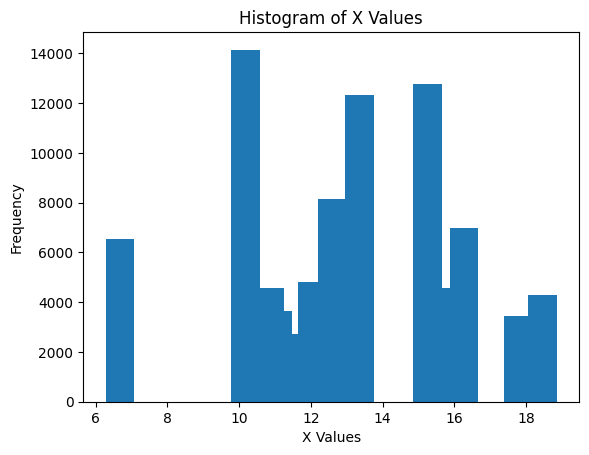

In [54]:
import matplotlib.pyplot as plt
# Create the histogram
plt.bar(X, Y, align='center')

# Add labels and title 
plt.xlabel('X Values')
plt.ylabel('Frequency')
plt.title('Histogram of X Values')

# Show the plot
plt.show()

In [7]:
import random
total_weight = 0.1
random_number = random.uniform(0, total_weight)
print(random_number)

0.010518894199433117


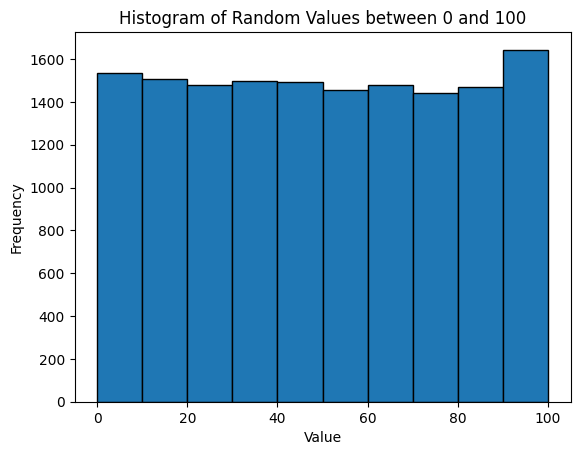

In [3]:
import matplotlib.pyplot as plt
import random

# Generate a list of random values
num_values = 15000  # You can change this to the desired number of random values
random_values = [random.randint(0, 100) for _ in range(num_values)]

# Create a histogram of the random values
plt.hist(random_values, bins=10, range=(0, 100), edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Random Values between 0 and 100')

# Show the plot
plt.show()
